In [29]:
import numpy as np

x_data = np.array([1,2,3,4,5]).reshape(5, 1)
t_data = np.array([2,3,4,5,6]).reshape(5, 1)
x_data.shape, t_data.shape

((5, 1), (5, 1))

In [21]:
raw_data = [[1,2],[2,3],[3,4],[4,5],[5,6]]
x_data = np.array(raw_data)[:,0].reshape(-1,1)
t_data = np.array(raw_data)[:,1].reshape(-1,1)
x_data.shape, t_data.shape

((5, 1), (5, 1))

In [36]:
W = np.random.rand(1,1)
b = np.random.rand(1)
W, W.ndim, b, b.ndim

(array([[0.11734211]]), 2, array([0.62295256]), 1)

In [26]:
def loss_func(x, t):
    y = np.dot(x, W) + b
    return np.sum((t - y)**2) / len(x)

In [31]:
def numerical_derivative(f, x):
    delta_x = 1e-4
    grad = np.zeros_like(x)
    
    it = np.nditer(x, flags=['multi_index'], op_flags=['readwrite'])
    
    while not it.finished:
        idx = it.multi_index
        tmp_val = x[idx]
        x[idx] = float(tmp_val) + delta_x
        fx1 = f(x)
        
        x[idx] = float(tmp_val) - delta_x
        fx2 = f(x)
        
        grad[idx] = (fx1 - fx2) / (2*delta_x)
        
        x[idx] = tmp_val
        it.iternext()
    
    return grad

In [28]:
def error_val(x, t):
    y = np.dot(x, W) + b
    return np.sum((t - y)**2) / len(x)

def predict(x):
    y = np.dot(x, W) + b
    return y

In [37]:
learning_rate = 1e-2

f = lambda x : loss_func(x_data, t_data)

print('Initial error vlaue =', error_val(x_data, t_data))
print('Initial W =', W)
print('Initial b =', b)

for step in range(8001):
    W -= learning_rate * numerical_derivative(f, W)
    
    b -= learning_rate * numerical_derivative(f, b)
    
    if (step % 400 == 0):
        print()
        print('step =', step, end=' ')
        print('Initial error vlaue =', error_val(x_data, t_data), end=' ')
        print('Initial W =', W, end=' ')
        print('Initial b =', b)

Initial error vlaue = 10.708922601322943
Initial W = [[0.11734211]]
Initial b = [0.62295256]

step = 0 Initial error vlaue = 6.302137434258 Initial W = [[0.33414969]] Initial b = [0.67044452]

step = 400 Initial error vlaue = 0.0003564045666919776 Initial W = [[1.01225938]] Initial b = [0.9557506]

step = 800 Initial error vlaue = 2.2740718409063435e-05 Initial W = [[1.0030967]] Initial b = [0.98882267]

step = 1200 Initial error vlaue = 1.4509922770083706e-06 Initial W = [[1.00078222]] Initial b = [0.99717663]

step = 1600 Initial error vlaue = 9.258188549997023e-08 Initial W = [[1.00019759]] Initial b = [0.99928682]

step = 2000 Initial error vlaue = 5.907271636450529e-09 Initial W = [[1.00004991]] Initial b = [0.99981985]

step = 2400 Initial error vlaue = 3.769188540379714e-10 Initial W = [[1.00001261]] Initial b = [0.99995449]

step = 2800 Initial error vlaue = 2.4049651223040295e-11 Initial W = [[1.00000318]] Initial b = [0.99998851]

step = 3200 Initial error vlaue = 1.534509929

In [38]:
predict(43)

array([[44.]])

In [43]:
loaded_data = np.loadtxt('data-01.csv', delimiter=',', dtype=np.float32)

x_data = loaded_data[:,:-1]
t_data = loaded_data[:, [-1]]

x_data.shape, t_data.shape

((25, 3), (25, 1))

In [44]:
W = np.random.rand(3,1)
b = np.random.rand(1)
W, b

(array([[0.30627725],
        [0.06735405],
        [0.09510872]]),
 array([0.27364126]))

In [47]:
def loss_func(x, t):
    y = np.dot(x, W) + b
    return np.sum((t-y)**2)/len(x)

In [48]:
def numerical_derivative(f, x):
    delta_x = 1e-4
    grad = np.zeros_like(x)
    
    it = np.nditer(x, flags=['multi_index'], op_flags=['readwrite'])
    
    while not it.finished:
        idx = it.multi_index
        tmp_val = x[idx]
        x[idx] = float(tmp_val) + delta_x
        fx1 = f(x)
        
        x[idx] = float(tmp_val) - delta_x
        fx2 = f(x)
        
        grad[idx] = (fx1 - fx2) / (2*delta_x)
        
        x[idx] = tmp_val
        it.iternext()
    
    return grad

In [49]:
def error_val(x, t):
    y = np.dot(x, W) + b
    return np.sum((t - y)**2) / len(x)

def predict(x):
    y = np.dot(x, W) + b
    return y

In [50]:
learning_rate = 1e-5

f = lambda x : loss_func(x_data, t_data)

print('Initial error vlaue =', error_val(x_data, t_data))
print('Initial W =', W.tolist())
print('Initial b =', b)

for step in range(1000001):
    W -= learning_rate * numerical_derivative(f, W)
    
    b -= learning_rate * numerical_derivative(f, b)
    
    if (step % 100000 == 0):
        print()
        print('step =', step, end=' ')
        print('Initial error vlaue =', error_val(x_data, t_data), end=' ')
        print('Initial W =', W.tolist(), end=' ')
        print('Initial b =', b)

Initial error vlaue = 15823.217788547923
Initial W = [[0.30627724932899236], [0.06735405439420028], [0.0951087209384397]]
Initial b = [0.27364126]

step = 0 Initial error vlaue = 5859.058851234886 Initial W = [[0.5070783594537499], [0.26931025374922724], [0.3020302668132146]] Initial b = [0.27515471]

step = 100000 Initial error vlaue = 6.118532688889288 Initial W = [[0.3559856536523826], [0.530047141268843], [1.1260811731146625]] Initial b = [0.10732786]

step = 200000 Initial error vlaue = 6.090272523674057 Initial W = [[0.3559838592239852], [0.5305189311170605], [1.1276458992263072]] Initial b = [-0.06076304]

step = 300000 Initial error vlaue = 6.064110029468866 Initial W = [[0.35598213268325174], [0.5309728735832939], [1.1291514331769634]] Initial b = [-0.22249522]

step = 400000 Initial error vlaue = 6.039889502170983 Initial W = [[0.3559804714559982], [0.53140964382115], [1.130600014154488]] Initial b = [-0.37810922]

step = 500000 Initial error vlaue = 6.017466795146734 Initial

In [51]:
predict([100,100,100])

array([201.59299271])

In [52]:
predict([50,50,50])

array([100.19865751])

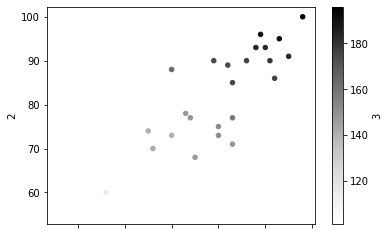

In [67]:
df = pd.DataFrame(loaded_data)
df.plot.scatter(x=1,y=2,c=3)

In [103]:
df1 = pd.read_csv('소비자물가지수_2015100__20200731115319.csv', encoding='cp949', index_col=0).T
#df1

In [104]:
df2 = pd.read_csv('연간지표_20200731115525.csv', encoding='cp949', index_col=0).iloc[[0],:].T
df2 = df2.astype('float')
df2['국민총소득(명목, 원화표시) (십억원)'] = df2['국민총소득(명목, 원화표시) (십억원)']/1663206.60*100
#df2

In [105]:
x_data = np.array(df1['전국']).reshape(-1,1)
t_data = np.array(df2['국민총소득(명목, 원화표시) (십억원)']).reshape(-1,1)

x_data.shape, t_data.shape, x_data.dtype, t_data.dtype

((55, 1), (55, 1), dtype('float64'), dtype('float64'))

In [106]:
x_data, t_data

(array([[  2.752],
        [  3.062],
        [  3.396],
        [  3.761],
        [  4.227],
        [  4.902],
        [  5.564],
        [  6.214],
        [  6.414],
        [  7.973],
        [  9.986],
        [ 11.517],
        [ 12.68 ],
        [ 14.513],
        [ 17.173],
        [ 22.101],
        [ 26.82 ],
        [ 28.748],
        [ 29.732],
        [ 30.408],
        [ 31.156],
        [ 32.013],
        [ 32.989],
        [ 35.346],
        [ 37.361],
        [ 40.564],
        [ 44.35 ],
        [ 47.106],
        [ 49.367],
        [ 52.46 ],
        [ 54.811],
        [ 57.51 ],
        [ 60.063],
        [ 64.576],
        [ 65.101],
        [ 66.572],
        [ 69.279],
        [ 71.193],
        [ 73.695],
        [ 76.341],
        [ 78.444],
        [ 80.202],
        [ 82.235],
        [ 86.079],
        [ 88.452],
        [ 91.051],
        [ 94.717],
        [ 96.789],
        [ 98.048],
        [ 99.298],
        [100.   ],
        [100.97 ],
        [102

In [115]:
def loss_func(x, t):
    y = np.dot(x, W) + b
    return np.sum((t-y)**2)/len(x)

In [116]:
def numerical_derivative(f, x):
    delta_x = 1e-4
    grad = np.zeros_like(x)
    
    it = np.nditer(x, flags=['multi_index'], op_flags=['readwrite'])
    
    while not it.finished:
        idx = it.multi_index
        tmp_val = x[idx]
        x[idx] = float(tmp_val) + delta_x
        fx1 = f(x)
        
        x[idx] = float(tmp_val) - delta_x
        fx2 = f(x)
        
        grad[idx] = (fx1 - fx2) / (2*delta_x)
        
        x[idx] = tmp_val
        it.iternext()
    
    return grad

In [117]:
def error_val(x, t):
    y = np.dot(x, W) + b
    return np.sum((t - y)**2) / len(x)

def predict(x):
    y = np.dot(x, W) + b
    return y

In [138]:
W = np.random.rand(1,1)
b = np.random.rand(1)
W, b

(array([[0.45482838]]), array([0.24055561]))

In [139]:
learning_rate = 1e-4

f = lambda x : loss_func(x_data, t_data)

print('Initial error vlaue =', error_val(x_data, t_data))
print('Initial W =', W.tolist())
print('Initial b =', b)

for step in range(100001):
    W -= learning_rate * numerical_derivative(f, W)
    
    b -= learning_rate * numerical_derivative(f, b)
    
    if (step % 10000 == 0):
#         print()
        print('step =', step, end=' ')
        print('Initial error vlaue =', error_val(x_data, t_data), end=' ')
        print('Initial W =', W.tolist(), end=' ')
        print('Initial b =', b)

Initial error vlaue = 636.1988422999273
Initial W = [[0.454828384259659]]
Initial b = [0.24055561]
step = 0 Initial error vlaue = 267.8320396131044 Initial W = [[0.6950855026678397]] Initial b = [0.24032753]
step = 10000 Initial error vlaue = 164.91073678022548 Initial W = [[0.9012971056959629]] Initial b = [-8.12916147]
step = 20000 Initial error vlaue = 144.9950528546603 Initial W = [[0.9613199853510139]] Initial b = [-12.5167262]
step = 30000 Initial error vlaue = 139.52226723017023 Initial W = [[0.9927846735935077]] Initial b = [-14.81673842]
step = 40000 Initial error vlaue = 138.0183579191403 Initial W = [[1.009278827354126]] Initial b = [-16.02243144]
step = 50000 Initial error vlaue = 137.60508698711288 Initial W = [[1.0179252536651149]] Initial b = [-16.65446968]
step = 60000 Initial error vlaue = 137.49152105464634 Initial W = [[1.0224578104143405]] Initial b = [-16.98579144]
step = 70000 Initial error vlaue = 137.4603133891257 Initial W = [[1.02483382912381]] Initial b = [-1

In [140]:
predict(100)

array([[85.38418848]])